In [1]:
run_name = "current/httperf_unbalance_wrr_to1_fdb"

In [2]:
import os
import glob
from functools import reduce

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Client side stats

In [4]:
# read in the data
plot_data_list = []

for i in glob.glob("./results/" + run_name + "/httperf_client_*.csv"):
    plot_data_list.append(pd.read_csv(i, header=0, na_filter=False))

In [5]:
plot_data = pd.DataFrame()

for i in ['Rate', 'Request rate', 'Number of requests',
          'Response status 1xx', 'Response status 2xx', 'Response status 3xx', 
          'Response status 4xx', 'Response status 5xx']:
    plot_data[i] = reduce(lambda x, y: x + y, [plot_data_list[j][i] for j in range(len(plot_data_list))])

plot_data['Response time'] = reduce(lambda x, y: x + y, [plot_data_list[j]['Response time'] 
                                                         for j in range(len(plot_data_list))]) / len(plot_data_list)

plot_data.head()

,Rate,Request rate,Number of requests,Response status 1xx,Response status 2xx,Response status 3xx,Response status 4xx,Response status 5xx,Response time
0,320,319.8,32000,0,32000,0,0,0,3.11250
1,640,639.4,32000,0,31997,0,0,0,13.86250
2,960,948.5,31783,0,30392,0,0,0,49.93750
3,1280,1247.2,31289,0,29739,0,0,0,18.36875
4,1600,1560.3,32000,0,31794,0,0,0,16.11875


### 1. Request rate

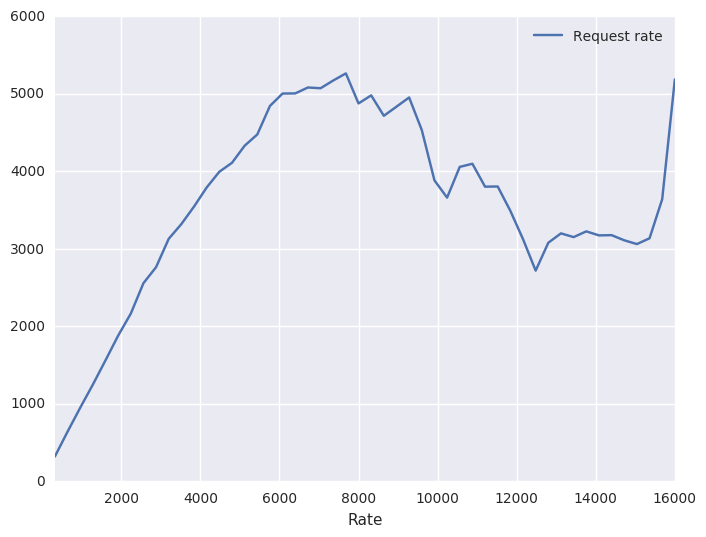

In [6]:
plot_data.plot('Rate', 'Request rate', ylim=(0, None))

In [7]:
plot_data['Rate'].describe()

count       50.000000
mean      8160.000000
std       4664.761516
min        320.000000
25%       4240.000000
50%       8160.000000
75%      12080.000000
max      16000.000000
Name: Rate, dtype: float64

In [8]:
plot_data['Request rate'].describe()

count      50.000000
mean     3577.782000
std      1239.070605
min       319.800000
25%      3113.825000
50%      3650.450000
75%      4670.675000
max      5263.600000
Name: Request rate, dtype: float64

### 2. Response time

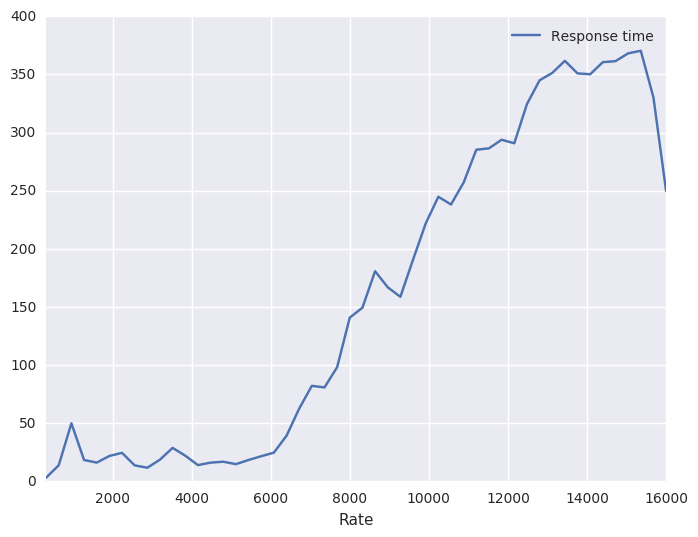

In [9]:
plot_data.plot('Rate', 'Response time', ylim=(0, None))

In [10]:
plot_data['Response time'].describe()

count     50.000000
mean     159.221625
std      137.692285
min        3.112500
25%       21.656250
50%      145.093750
75%      289.720312
max      370.350000
Name: Response time, dtype: float64

### 3. Success rate

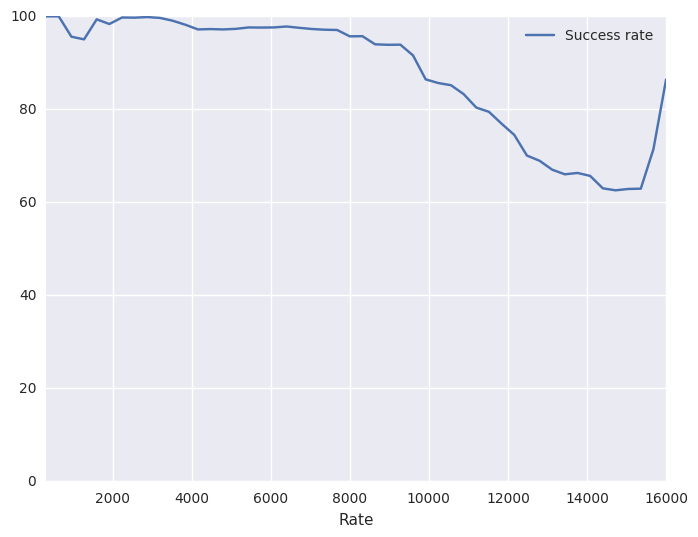

In [11]:
plot_data['Success rate'] = (plot_data['Response status 2xx'] + plot_data['Response status 3xx']) / plot_data['Number of requests'] * 100.0
plot_data.plot('Rate', 'Success rate', ylim=(0, None))

In [12]:
plot_data['Success rate'].describe()

count     50.000000
mean      87.661245
std       13.212992
min       62.583115
25%       77.546331
50%       95.334814
75%       97.603481
max      100.000000
Name: Success rate, dtype: float64

## Server side stats

In [13]:
# read in the stats data
stats_data = pd.read_csv("./results/" + run_name + "/httperf_server_stats.csv", header=0, na_filter=False)
stats_data['Connections Ratio (%)'] = stats_data['Connections'] / sum(stats_data['Connections']) * 100
stats_data['Packets Ratio (%)'] = stats_data['Packets'] / sum(stats_data['Packets']) * 100
stats_data['Bytes Ratio (%)'] = stats_data['Bytes (K)'] / sum(stats_data['Bytes (K)']) * 100
stats_data

,Server,Connections,Packets,Bytes (K),Connections Ratio (%),Packets Ratio (%),Bytes Ratio (%)
0,11.11.11.107:80,6310,392181,25784,10.195673,5.950213,5.847428
1,11.11.11.106:80,18470,2087675,139879,29.843753,31.674435,31.722478
2,11.11.11.103:80,19054,2073998,138876,30.787377,31.466926,31.495013
3,11.11.11.102:80,18055,2037187,136407,29.173197,30.908426,30.935080
